In [5]:
import numpy as np
import matplotlib.pyplot as plt
from model import get_default_dual_pipeline_model
from matplotlib import cm

plt.rcParams["font.family"] = "Times New Roman"

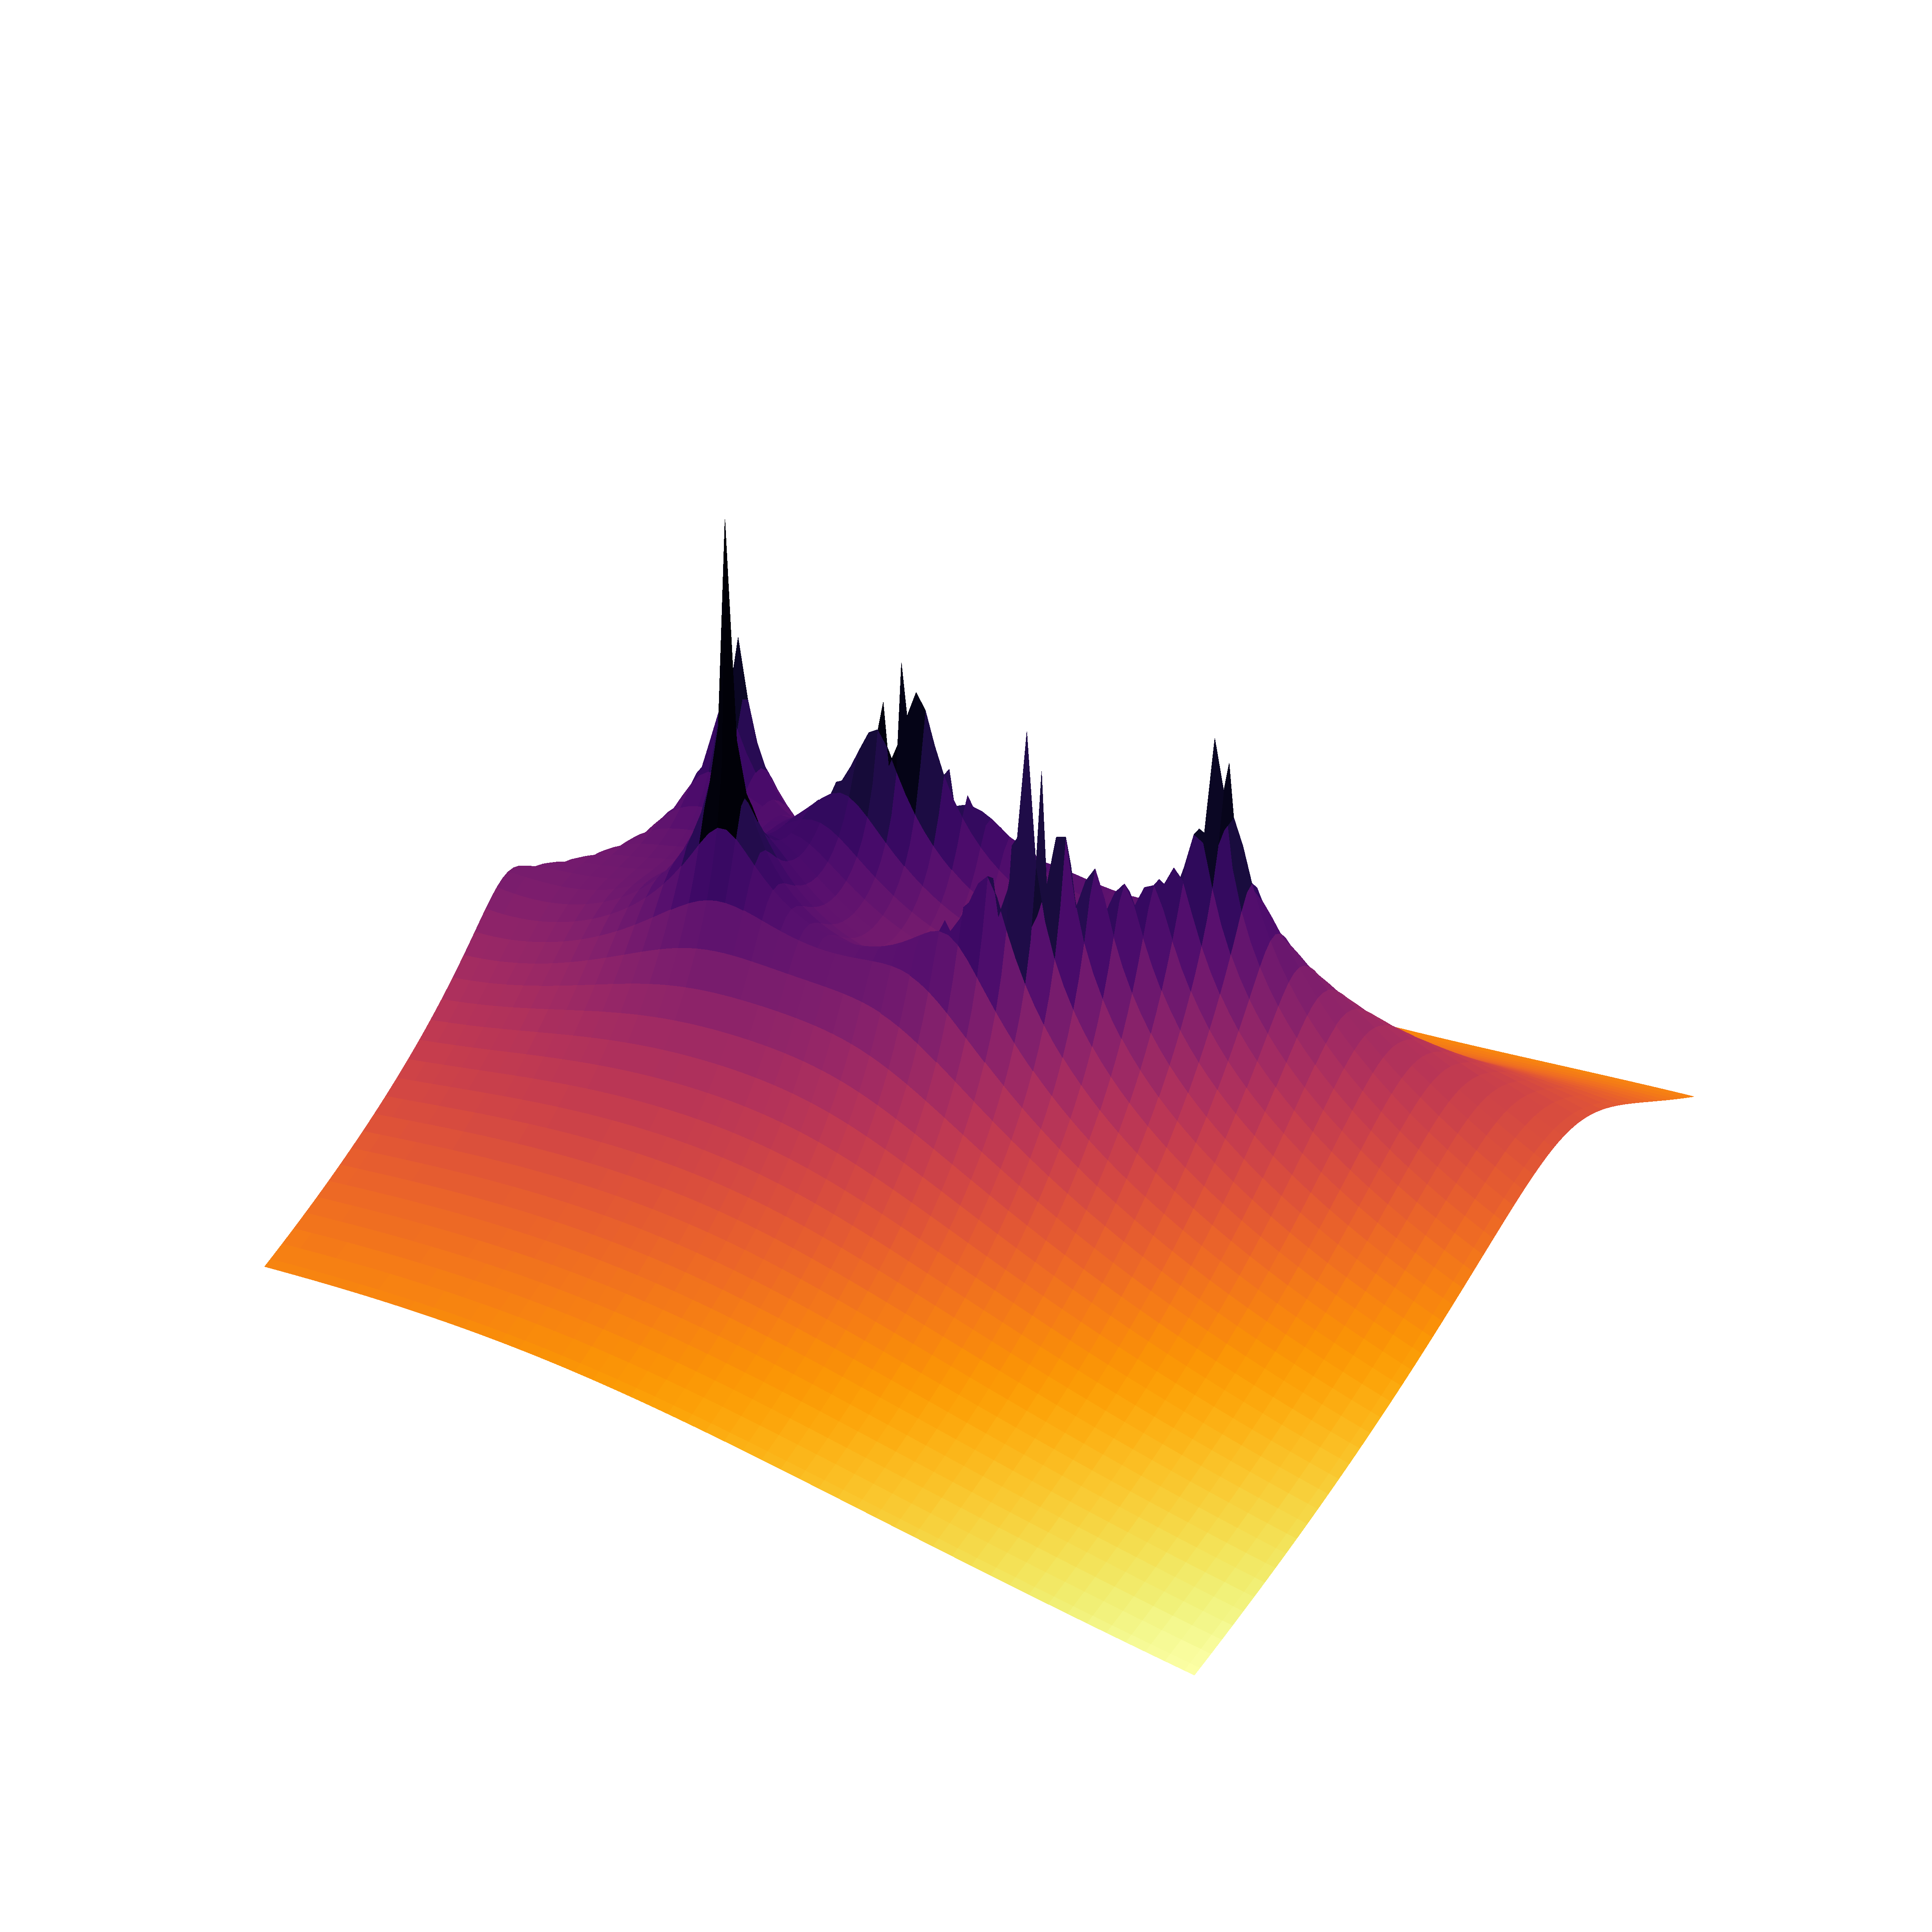

In [6]:
def plot_multi_pipeline_error_field():
    # configure model
    model = get_default_dual_pipeline_model()

    powers = [500000]
    
    for power in powers:
        model.power = power
        
        flow_rates_pipe1 = np.linspace(-2, 2, 100)
        flow_rates_pipe2 = np.linspace(-2, 2, 100)
        differential_pressures = np.zeros((len(flow_rates_pipe1), len(flow_rates_pipe2)))
        
        def get_diff_pressure(x, y):
            model.pipelines[0].flow_rate = x
            model.pipelines[1].flow_rate = y
            
            return np.sum(np.power(model.differential_pressures(), 2))
        
        # calculate pressure for different flow rate and power combinations
        for i, frp1 in enumerate(flow_rates_pipe1):
            for j, frp2 in enumerate(flow_rates_pipe2):
                differential_pressures[i, j] = get_diff_pressure(frp1, frp2)
                
        # optimize the flow_rates for balance
        model.pipelines[0].flow_rate = 1
        model.pipelines[1].flow_rate = 1
        res = model.optimize_flow_rates()
        
        fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10), dpi=600)
        x, y = np.meshgrid(flow_rates_pipe1, flow_rates_pipe2)

        ax.view_init(elev=25, azim=30, roll=0)
        ax.invert_zaxis()
        plt.xlabel("Flow Rate Pipe 1 [m^3]")
        plt.ylabel("Flow Rate Pipe 2 [m^3]")
        plt.gca().get_xaxis().set_visible(False)
        differential_pressures=np.log2(differential_pressures)
        ax.grid(False)
        ax.set_zticks([])
        ax.axis("off")
        ax.plot_surface(x, y, differential_pressures, cmap=cm.inferno, linewidth=0, antialiased=False)

        plt.show()
        
plot_multi_pipeline_error_field()